In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("~/downloads/games.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop columns with excessive missing values
df = df.drop(columns=['Metacritic url', 'Score rank'])

# Drop rows where 'Name' is missing (critical column)
df = df.dropna(subset=['Name'])

# Fill missing values in less critical columns with default values
df['Genres'] = df['Genres'].fillna('Unknown')
df['Developers'] = df['Developers'].fillna('Unknown')
df['Publishers'] = df['Publishers'].fillna('Unknown')
df['Reviews'] = df['Reviews'].fillna('No Reviews')




Missing Values:
 AppID                             0
Name                              1
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2436
Supported languages               0
Full audio languages              0
Reviews                       62549
Header image                      0
Website                       36643
Support url                   35466
Support email                 11120
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                67938
User score                        0
Positive                          0
Negative                          0
Score rank                    71674
Achievements                      0
Recommendations                   0
Notes     

In [4]:
# Convert 'Release date' to datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# Convert boolean columns to integers for consistency
df['Windows'] = df['Windows'].astype(int)
df['Mac'] = df['Mac'].astype(int)
df['Linux'] = df['Linux'].astype(int)


In [5]:
# Add a 'Release Year' column
df['Release Year'] = df['Release date'].dt.year


In [6]:
# Combine Positive and Negative reviews
df['Total Reviews'] = df['Positive'] + df['Negative']


In [7]:
# Filter games with a specific genre
action_games = df[df['Genres'].str.contains('Action', na=False)]
print(f"\nNumber of Action Games: {len(action_games)}")



Number of Action Games: 28870


In [8]:
# Subset of free-to-play games
free_games = df[df['Price'] == 0]
print(f"\nNumber of Free-to-Play Games: {len(free_games)}")



Number of Free-to-Play Games: 12409


In [14]:
# Save to a new CSV file

processed_file_path = "~/downloads/steam_data.csv"
df.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")
# Check for NaN values in the dataset


Processed data saved to ~/downloads/steam_data.csv


In [13]:
# Drop rows with any NaN values
# Drop rows with any NaN values
df = df.dropna()

# Alternatively, drop rows for specific columns
df = df.dropna(subset=['Price', 'Genres'])

print("Missing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Reviews                       0
Header image                  0
Website                       0
Support url                   0
Support email                 0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Notes                         0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Develope

In [12]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd

# Step 1: Load the Processed Dataset
file_path = "~/downloads/processed_steam_data.csv"  # Replace with your processed dataset path
df = pd.read_csv(file_path)

# Step 2: Initialize Firebase
# Replace with the path to your Firebase service account JSON file
service_account_path = "~/Downloads/gaming.json" 
database_url = "https://gaminginsight-169d0-default-rtdb.europe-west1.firebasedatabase.app/"

# Initialize Firebase Admin SDK
cred = credentials.Certificate(service_account_path)
firebase_admin.initialize_app(cred, {'databaseURL': database_url})

# Step 3: Upload Data to Firebase
# Convert DataFrame to a list of dictionaries
data = df.to_dict(orient='records')

# Define a reference in Firebase Realtime Database
ref = db.reference('steam_games')  # Replace 'steam_games' with your desired database path

# Upload the data
ref.set(data)
print("Data uploaded successfully to Firebase!")


Data uploaded successfully to Firebase!


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Load the dataset
# Ensure the dataset is cleaned prior to ML tasks (e.g., NaN handling, column renaming).
df = pd.read_csv("~/downloads/processed_steam_data.csv")

# Replace NaN values to ensure no issues during modeling
df.fillna({
    'Price': 0,
    'Genres': 'Unknown',
    'Positive': 0,
    'Negative': 0,
    'Average playtime forever': 0
}, inplace=True)

# Feature engineering
df['Total Reviews'] = df['Positive'] + df['Negative']  # Total review count
df['Success'] = (df['Peak CCU'] > 5000).astype(int)  # Define a game as successful if Peak CCU > 5000
df['Release Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization for 'Genres' and 'Tags' columns
vectorizer = TfidfVectorizer(stop_words='english')

# Combine genres and tags for similarity
df['Combined Features'] = df['Genres'] + ' ' + df['Tags']
tfidf_matrix = vectorizer.fit_transform(df['Combined Features'].fillna(''))

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend_games(game_name, top_n=5):
    try:
        idx = df[df['Name'].str.contains(game_name, case=False, na=False)].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_indices = [i[0] for i in sim_scores[1:top_n+1]]
        return df.iloc[sim_indices][['Name', 'Genres', 'Price']]
    except IndexError:
        return "Game not found!"

# Example recommendation
print(recommend_games("Game 1"))


Game not found!


In [18]:
# Define features and target
X = df[['Price', 'Total Reviews', 'Achievements', 'Average playtime forever']]
y = df['Success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Success Prediction Accuracy: {accuracy * 100:.2f}%")


Success Prediction Accuracy: 99.13%


In [20]:
from sklearn.naive_bayes import MultinomialNB

# Dummy sentiment labels (replace with real labeled data if available)
df['Sentiment'] = np.where(df['Positive'] > df['Negative'], 1, 0)

# Vectorize text data
tfidf_reviews = vectorizer.fit_transform(df['Reviews'].fillna(''))

# Split data
X_train, X_test, y_train, y_test = train_test_split(tfidf_reviews, df['Sentiment'], test_size=0.2, random_state=42)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions and accuracy
accuracy = clf.score(X_test, y_test)
print(f"Sentiment Analysis Accuracy: {accuracy * 100:.2f}%")


Sentiment Analysis Accuracy: 85.55%


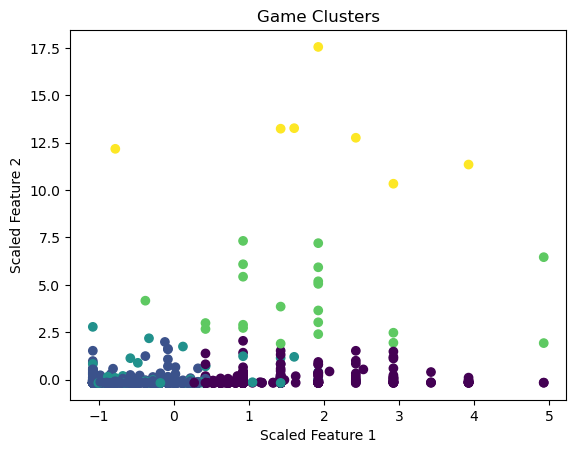

In [21]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Price', 'Total Reviews', 'Achievements']])

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("Game Clusters")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()


In [ ]:
import schedule
import time

def fetch_data():
    print("Fetching latest game data...")

# Schedule the task
schedule.every().day.at("00:00").do(fetch_data)

while True:
    schedule.run_pending()
    time.sleep(1)


In [35]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("~/downloads/processed_steam_data.csv")

genre_forecast = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023, 2024],
    'Popularity': [100, 200, 300, 400, 500]  # Example data
})
genre_forecast.to_csv('genre_forecast.csv', index=False)


# Dashboard for recommendations
st.title("Steam Game Recommendations")
game_name = st.text_input("Enter a game name:")
if game_name:
    recommendations = recommend_games(game_name, top_n=5)  # Use your recommendation function
    st.write("Recommended Games:")
    st.dataframe(recommendations)

# Visualize genre popularity
st.title("Genre Popularity Forecast")
genre_data = pd.read_csv("genre_forecast.csv")  # Example forecast data
st.line_chart(genre_data.set_index('Year'))



DeltaGenerator()